### Importing Libraries

In [1158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

from imblearn.over_sampling import SMOTE
from scipy.stats import skew

### Data Loading

In [1159]:
data = pd.read_csv("C:\\Users\\venka\\Documents\\TPO\\WineQT.csv")

### Data Exploration

In [1160]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [1161]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [1162]:
data.shape

(1143, 13)

The dataset has 1143 observation and 13 characteristics.

In [1163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


The dataset has no null values and contains only float and integer values.


In [1164]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Basic Statistics Summary.

In [1165]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

1,2,9 and 10 Quality ratings are not given by any observations. Only Scores obtained are between 3 and 8.


### Data Correlation

In [1166]:
data.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
Id                      0.069708
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

### Data Visualization

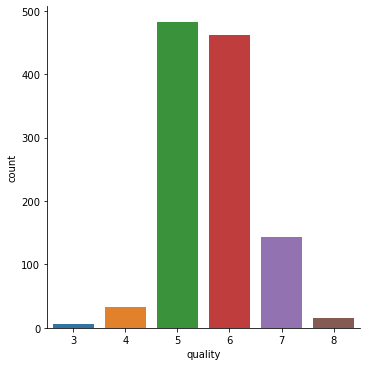

In [1167]:
sns.catplot(x='quality',kind='count',data=data,height=5)

* Quality has more values in Categories 5,6 and 7. 
* Using SMOTE method to balance the data.

In [1168]:
smote = SMOTE()

In [1169]:
new_data,y = smote.fit_resample(data.drop('quality',axis=1),data['quality'])

In [1170]:
new_data['quality'] = y

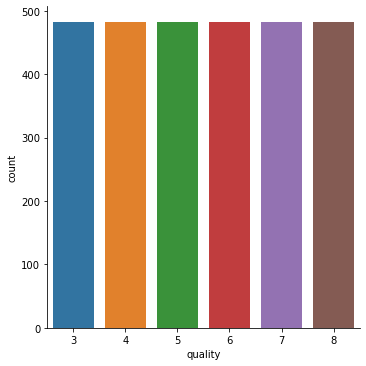

In [1171]:
sns.catplot(x='quality',kind='count',data=new_data,height=5)

After applying SMOTE method quality shows equal values in all categories. 

In [1172]:
new_data.shape

(2898, 13)

<AxesSubplot:>

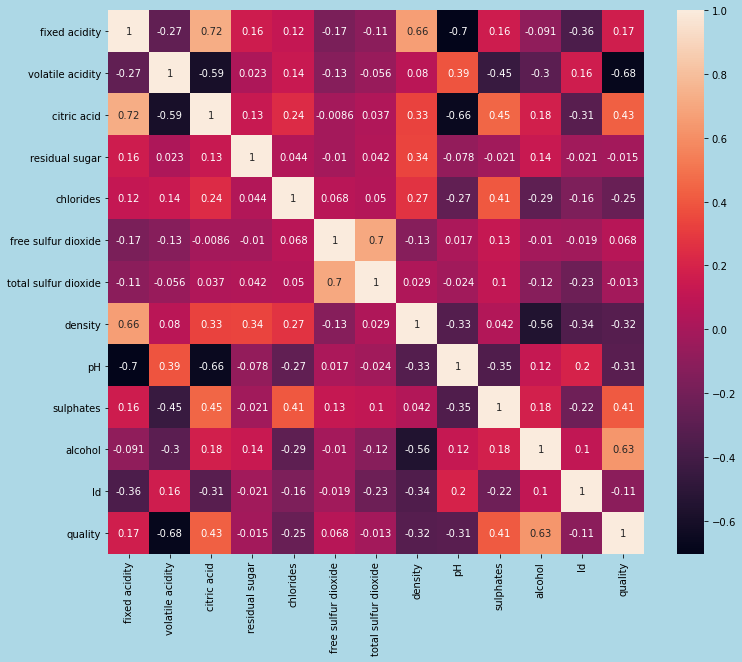

In [1173]:
fig, ax = plt.subplots(figsize=[12,10],facecolor='lightblue')
corr = new_data.corr()
sns.heatmap(corr, ax=ax, annot = True)

Residual sugar has very low correlation with the quality.

fixed acidity
1.0435581570203705


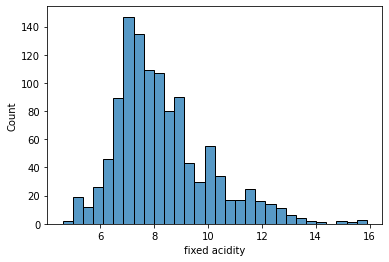

volatile acidity
0.6806526689497612


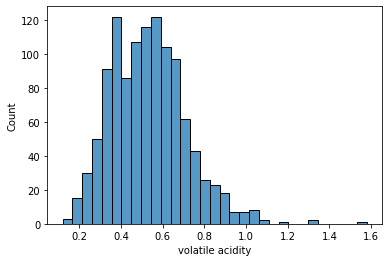

citric acid
0.3710729929318701


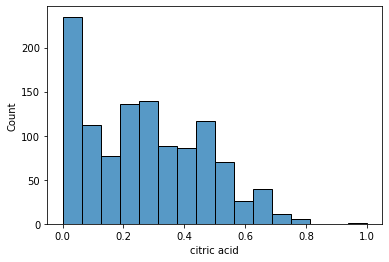

residual sugar
4.355371093085976


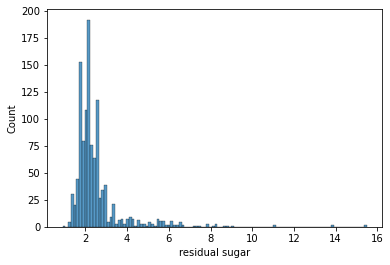

chlorides
6.018448660519524


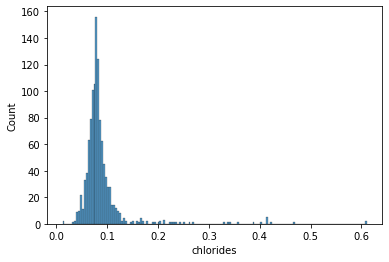

free sulfur dioxide
1.229644739026475


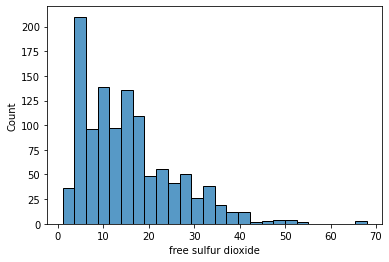

total sulfur dioxide
1.6635791721121174


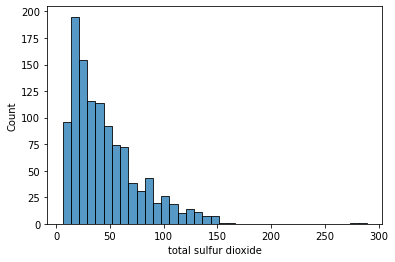

density
0.10226068292206784


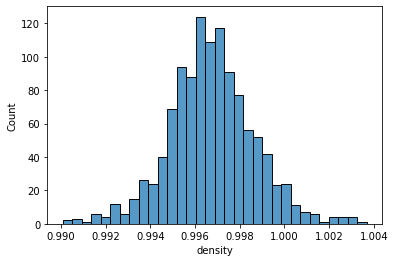

pH
0.22084807837665207


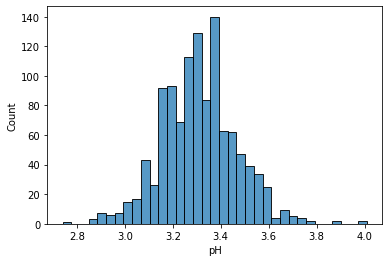

sulphates
2.4939876038821924


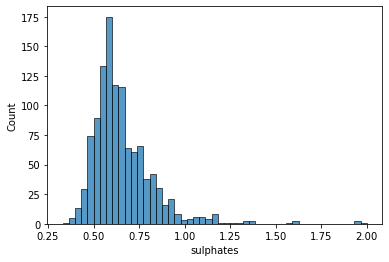

alcohol
0.8621798614666255


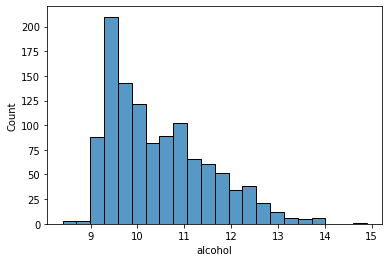

quality
0.2864151961088048


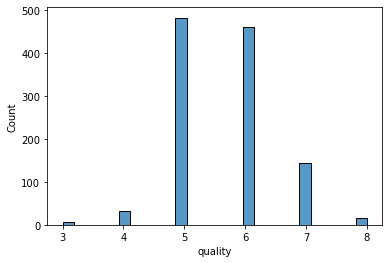

Id
-0.010405535902206199


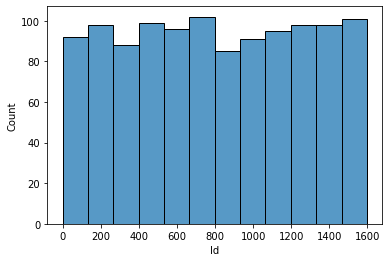

In [1174]:
for col in data:
    print(col)
    print(skew(data[col]))
    
    plt.figure()
    sns.histplot(data[col])
    plt.show()

* Data distibution on each feature.
* Density and pH shows normal distribution.
* Residual sugar and chlorides shows very high positive skewness.

In [1175]:
new_data['residual sugar'] = np.sqrt(new_data['residual sugar'])
new_data['chlorides'] = np.sqrt(new_data['chlorides'])

print(skew(new_data['residual sugar']))
print(skew(new_data['chlorides']))

2.05538713054681
3.5827085460463763


Using square root method the skewness of residual sugar and chlorides are reduced.

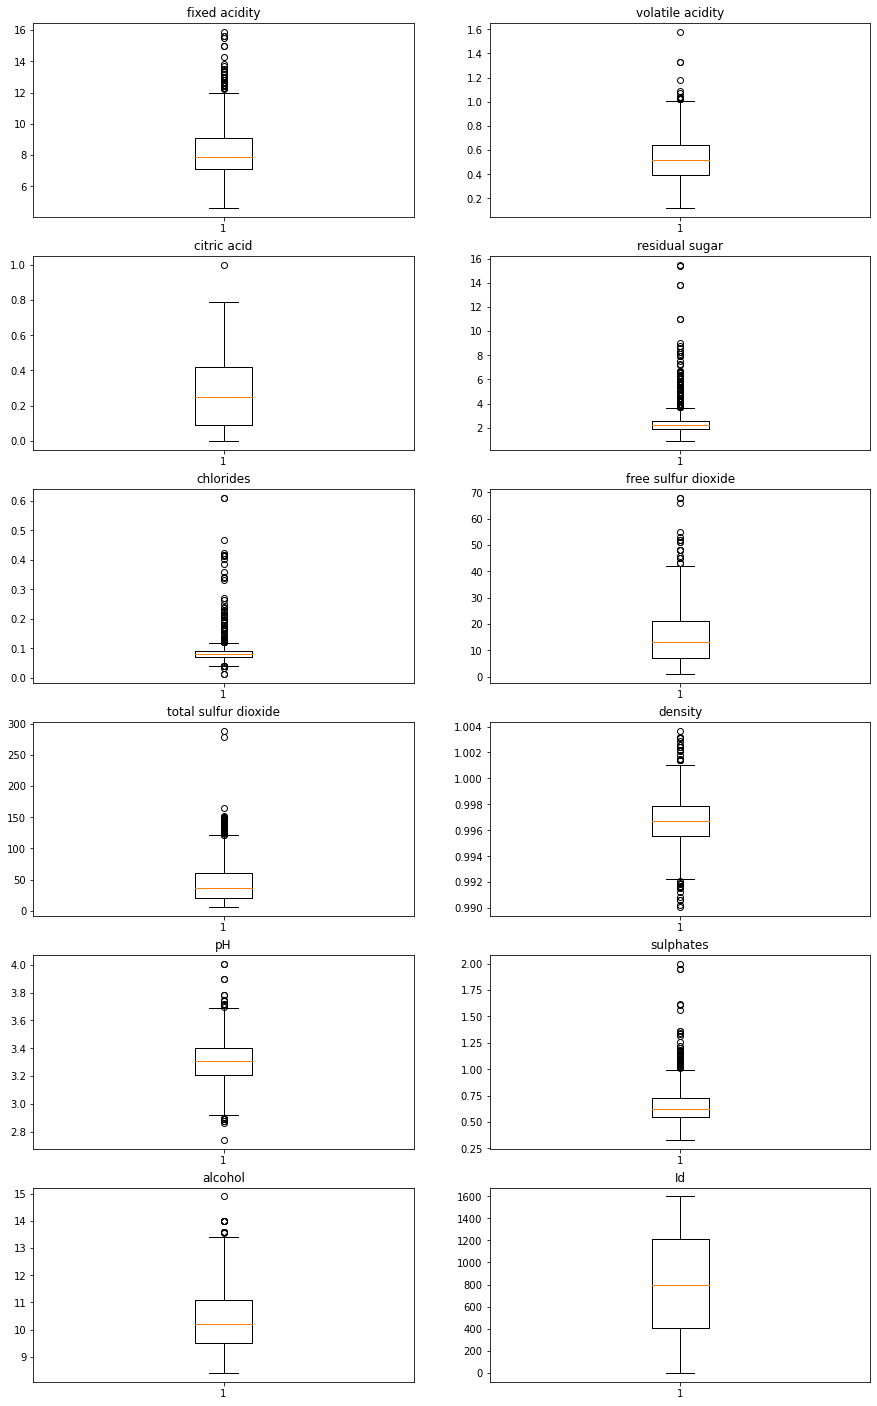

In [1176]:
plt.figure(figsize = (15,25))
count = 1
for col in new_data.drop('quality',axis=1).columns:
    plt.subplot(6,2,count)
    plt.boxplot(data[col])
    plt.title(col)
    count += 1
plt.show()

* All the features shows outliers.
* Outliers are handled using IQR method.

In [1177]:
def outliers(df,col,dis):
    
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    
    upper_limit = df[col].quantile(0.75) + IQR*dis
    lower_limit = df[col].quantile(0.25) - IQR*dis
    
    return lower_limit,upper_limit

In [1178]:
l,u = outliers(new_data,'fixed acidity',1.5)
new_data = new_data[ (new_data['fixed acidity'] > l) & (new_data['fixed acidity'] < u)]

In [1179]:
l,u = outliers(new_data,'chlorides',3)
new_data = new_data[ (new_data['chlorides'] > l) & (new_data['chlorides'] < u)]

In [1180]:
new_data.shape

(2738, 13)

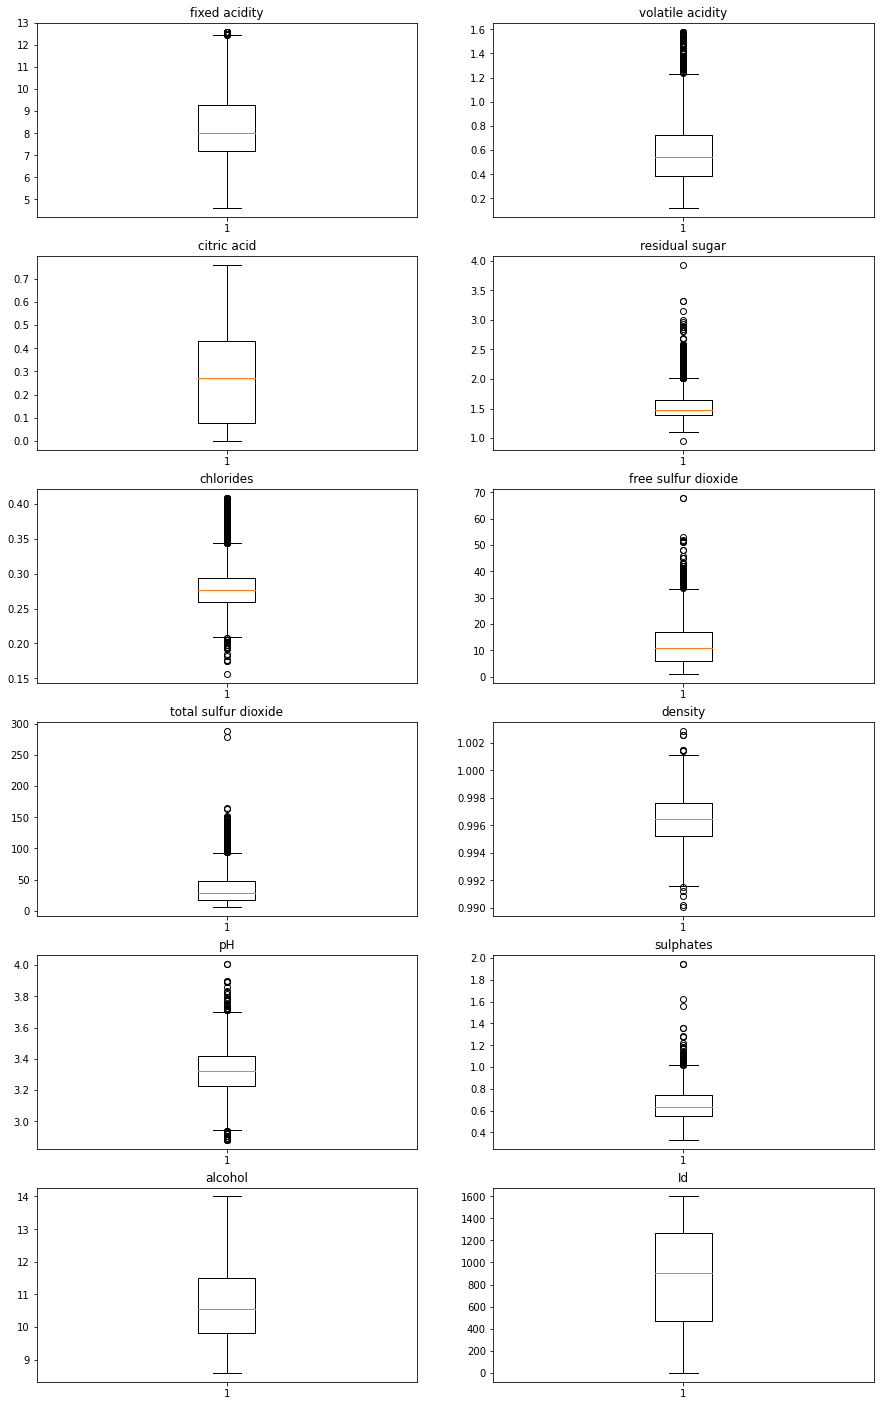

In [1181]:
plt.figure(figsize =(15,25))
count = 1
for col in new_data.drop('quality',axis=1).columns:
    plt.subplot(6,2,count)
    plt.boxplot(new_data[col])
    plt.title(col)
    count += 1
plt.show()

Outliers are removed by the IQR method.

<AxesSubplot:>

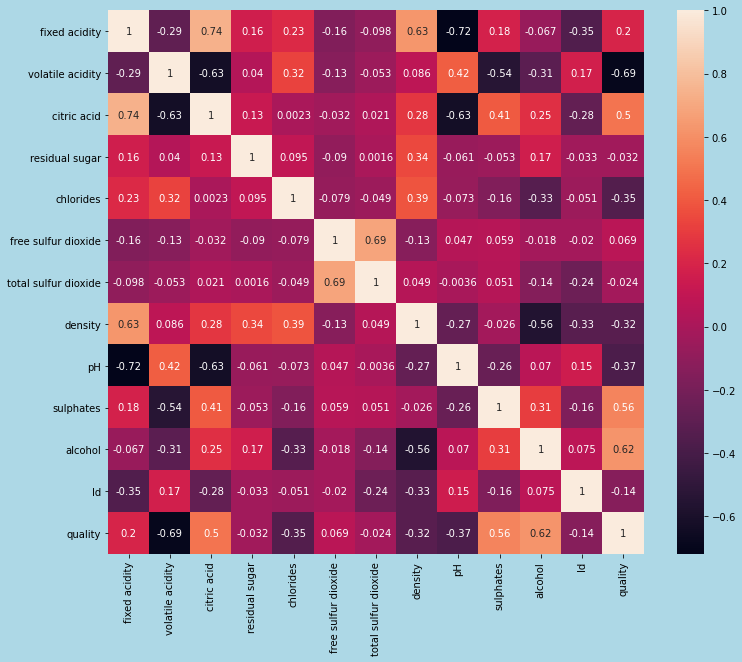

In [1182]:
fig, ax = plt.subplots(figsize=[12,10],facecolor='lightblue')
corr = new_data.corr()
sns.heatmap(corr, ax=ax, annot=True)

* After dealing with skewness and outliers the correlation of some of the features with qulality is increased.
* Outliers and skewness are reduced in only some of the features because dealing this with other features reduces correlation of some of the features on quality and accuracy was going down.

In [1183]:
new_data = new_data.drop('total sulfur dioxide',axis=1)

Since total sulfur dioxide is having very low correlation it is safe to drop and does not affects the accuracy.

### Data splitting 

In [1184]:
xtrain, xtest, ytrain, ytest = train_test_split(new_data.drop('quality',axis=1),new_data['quality'], test_size=0.4, random_state=0)

In [1185]:
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,Id
319,10.400000,0.330000,0.630000,1.673320,0.289828,5.000000,0.999800,3.260000,0.740000,11.200000,453
1161,10.172548,0.936863,0.424470,1.471161,0.310616,8.215685,0.998645,3.339216,0.509333,9.678040,758
1965,8.681705,0.613549,0.276341,1.578744,0.293440,19.365894,0.997505,3.236341,0.654320,9.252682,49
2799,8.914467,0.407421,0.459183,1.341641,0.264361,6.628934,0.994820,3.261949,0.690000,12.203147,1113
2246,5.695124,0.405834,0.318400,1.656416,0.295029,24.711720,0.994527,3.689102,0.624654,12.300000,1107


In [1186]:
ytrain.head()

319     7
1161    3
1965    4
2799    8
2246    7
Name: quality, dtype: int64

### Feature scaling

In [1187]:
sc_x = MinMaxScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)

### Training the Model 

In [1188]:
linear = LinearRegression()
svr = svm.SVR()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [1189]:
linear.fit(xtrain,ytrain)

LinearRegression()

In [1190]:
svr.fit(xtrain,ytrain)

SVR()

In [1191]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [1192]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

### Prediction

In [1193]:
y_pred_linear = linear.predict(xtest)
y_pred_svr = svr.predict(xtest)
y_pred_dt = dt.predict(xtest)
y_pred_rf = rf.predict(xtest)

### Errors 

In [1194]:
error_linear = mean_squared_error((y_pred_linear),ytest)
error_svr = mean_squared_error((y_pred_svr),ytest)
error_dt = mean_squared_error(y_pred_dt,ytest)
error_rf = mean_squared_error((y_pred_rf),ytest)

In [1195]:
from math import sqrt
print("    MODELS       :       MSE                   RMSE\n")
print("LinearRegression : ",error_linear,"  ",sqrt(error_linear))
print("support Vector   : ",error_svr,"  ",sqrt(error_svr))
print("Decision Tree    : ",error_dt,"  ",sqrt(error_dt))
print("Random Forest    : ",error_rf,"  ",sqrt(error_rf))

    MODELS       :       MSE                   RMSE

LinearRegression :  0.7839048945543405    0.8853840378922248
support Vector   :  0.4097802408215389    0.6401407976543433
Decision Tree    :  0.5428832116788321    0.7368060882476692
Random Forest    :  0.253208394160584    0.5031981658954889


### Final Results

In [1196]:
print('      MODELS               :       Accuracy\n')
print('Linear Regression          : ',r2_score(ytest,y_pred_linear))
print('Support Vector Regression  : ',r2_score(ytest,y_pred_svr))
print('Decision Tree Regressor    : ',r2_score(ytest,y_pred_dt))
print('Random Forest Regressor    : ',r2_score(ytest,y_pred_rf))

      MODELS               :       Accuracy

Linear Regression          :  0.730180014316546
Support Vector Regression  :  0.8589536824174461
Decision Tree Regressor    :  0.8131396532659155
Random Forest Regressor    :  0.9128456962547985


All the Models are giving good results out of which Random Forest Regressor is giving the best results.